# Analyzing Stackoverflow Developer Survey Data 2024

This notebook is structured according to CRISP-DM:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modeling
5. Result Evaluation
6. Deployment

## 1. Business Understanding

In the following Stackoverflow Developer Survey Data from 2024 will be analysed.

The main questions I try to answer are:

**1. Which technologies are the most popular and widely used?**

- Are there differences depending on the region?
- Are there differences based on the experience of developers or developer groups?
- Which technologies are currently being used the most, and which ones would the participants like to work with in the future?

**2. Which technologies currently offer the highest salaries?**

- Are there differences depending on the country/region?

**3. What developer profiles exist, and how do they differ from each other?**

## 2. Data Understanding

In [357]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [358]:
# read csv data
df = pd.read_csv("survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [359]:
df.shape
print(f"The data set has {df.shape[0]} rows and {df.shape[1]} columns")

The data set has 65437 rows and 114 columns


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [361]:
df.describe(include="all")

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


In [362]:
# missing values
missing_values = pd.DataFrame(df.isna().sum()).reset_index()
missing_values.columns = ["column", "count_missing_vals"]
missing_values["percent_missing"] = missing_values["count_missing_vals"]/df.shape[0]*100
missing_values.sort_values("percent_missing", ascending=False)

,column,count_missing_vals,percent_missing
75,AINextMuch less integrated,64289,98.245641
74,AINextLess integrated,63082,96.401119
72,AINextNo change,52939,80.900714
71,AINextMuch more integrated,51999,79.464217
36,EmbeddedAdmired,48704,74.428840
...,...,...,...
1,MainBranch,0,0.000000
2,Age,0,0.000000
3,Employment,0,0.000000
5,Check,0,0.000000


## 3. Data Preparation

In [363]:
# make copy of original dataframe
df_clean = df.copy()

In [364]:
# keep only relevant columns (personal data of the participants and language/tech tool data)
columns_to_keep = [
    'Age',
    'Country',
    'YearsCodePro',
    'RemoteWork',
    'DevType',
    'EdLevel',
    'CompTotal',
    'Currency',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith',
    'PlatformHaveWorkedWith',
    'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith',
    'WebframeWantToWorkWith',
    'MiscTechHaveWorkedWith',
    'MiscTechWantToWorkWith',
    'ToolsTechHaveWorkedWith',
    'ToolsTechWantToWorkWith',
    'AISearchDevHaveWorkedWith',
    'AISearchDevWantToWorkWith',
    'AISelect',
    'AISent',
    'AIBen',
    'AIAcc',
    'AIComplex'
]

In [365]:
df_clean = df_clean[columns_to_keep]
df_clean.shape

(65437, 27)

In [366]:
df_clean.head()

,Age,Country,YearsCodePro,RemoteWork,DevType,EdLevel,CompTotal,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISelect,AISent,AIBen,AIAcc,AIComplex
0,Under 18 years old,United States of America,NaN,Remote,NaN,Primary/elementary school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN
1,35-44 years old,United Kingdom of Great Britain and Northern I...,17,Remote,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,...,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN
2,45-54 years old,United Kingdom of Great Britain and Northern I...,27,Remote,Developer Experience,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,C#,C#,...,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,MSBuild,MSBuild,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN
3,18-24 years old,Canada,NaN,NaN,"Developer, full-stack",Some college/university study without earning ...,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,...,NaN,Docker;npm;Pip,Docker;Kubernetes;npm,NaN,NaN,Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,Bad at handling complex tasks
4,18-24 years old,Norway,NaN,NaN,"Developer, full-stack","Secondary school (e.g. American high school, G...",NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,...,NaN,APT;Make;npm,APT;Make,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN


In [367]:
df_clean.dtypes

Age                           object
Country                       object
YearsCodePro                  object
RemoteWork                    object
DevType                       object
EdLevel                       object
CompTotal                    float64
Currency                      object
LanguageHaveWorkedWith        object
LanguageWantToWorkWith        object
DatabaseHaveWorkedWith        object
DatabaseWantToWorkWith        object
PlatformHaveWorkedWith        object
PlatformWantToWorkWith        object
WebframeHaveWorkedWith        object
WebframeWantToWorkWith        object
MiscTechHaveWorkedWith        object
MiscTechWantToWorkWith        object
ToolsTechHaveWorkedWith       object
ToolsTechWantToWorkWith       object
AISearchDevHaveWorkedWith     object
AISearchDevWantToWorkWith     object
AISelect                      object
AISent                        object
AIBen                         object
AIAcc                         object
AIComplex                     object
d

In [368]:
# age as categorical variable
df_clean['Age'] = df_clean['Age'].astype('category')

In [369]:
df_clean.shape

(65437, 27)

In [370]:
df_clean['Age'].unique()

['Under 18 years old', '35-44 years old', '45-54 years old', '18-24 years old', '25-34 years old', '55-64 years old', 'Prefer not to say', '65 years or older']
Categories (8, object): ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say', 'Under 18 years old']

In [371]:
df_clean["YearsCodePro"].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [372]:
# convert YearsCodePro to numeric (replace non-numeric values)
df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')

In [373]:
df_clean.dtypes

Age                          category
Country                        object
YearsCodePro                  float64
RemoteWork                     object
DevType                        object
EdLevel                        object
CompTotal                     float64
Currency                       object
LanguageHaveWorkedWith         object
LanguageWantToWorkWith         object
DatabaseHaveWorkedWith         object
DatabaseWantToWorkWith         object
PlatformHaveWorkedWith         object
PlatformWantToWorkWith         object
WebframeHaveWorkedWith         object
WebframeWantToWorkWith         object
MiscTechHaveWorkedWith         object
MiscTechWantToWorkWith         object
ToolsTechHaveWorkedWith        object
ToolsTechWantToWorkWith        object
AISearchDevHaveWorkedWith      object
AISearchDevWantToWorkWith      object
AISelect                       object
AISent                         object
AIBen                          object
AIAcc                          object
AIComplex   

In [374]:
df_clean.head()

,Age,Country,YearsCodePro,RemoteWork,DevType,EdLevel,CompTotal,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISelect,AISent,AIBen,AIAcc,AIComplex
0,Under 18 years old,United States of America,NaN,Remote,NaN,Primary/elementary school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN
1,35-44 years old,United Kingdom of Great Britain and Northern I...,17.0,Remote,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,...,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN
2,45-54 years old,United Kingdom of Great Britain and Northern I...,27.0,Remote,Developer Experience,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,C#,C#,...,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,MSBuild,MSBuild,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN
3,18-24 years old,Canada,NaN,NaN,"Developer, full-stack",Some college/university study without earning ...,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,...,NaN,Docker;npm;Pip,Docker;Kubernetes;npm,NaN,NaN,Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,Bad at handling complex tasks
4,18-24 years old,Norway,NaN,NaN,"Developer, full-stack","Secondary school (e.g. American high school, G...",NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,...,NaN,APT;Make;npm,APT;Make,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN


In [375]:
# identify columns with more than 1 value
multiple_value_cols = [col for col in df_clean.columns if df_clean[col].astype(str).str.contains(";").any()]

# apply split() to these columns
for col in multiple_value_cols:
    df_clean[col] = df_clean[col].str.split(";")

In [376]:
df_clean.head()

,Age,Country,YearsCodePro,RemoteWork,DevType,EdLevel,CompTotal,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISelect,AISent,AIBen,AIAcc,AIComplex
0,Under 18 years old,United States of America,NaN,Remote,NaN,Primary/elementary school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,[Increase productivity],NaN,NaN
1,35-44 years old,United Kingdom of Great Britain and Northern I...,17.0,Remote,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...","[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",...,NaN,"[Docker, Homebrew, Kubernetes, npm, Vite, Webp...","[Docker, Homebrew, Kubernetes, npm, Vite, Webp...",NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN
2,45-54 years old,United Kingdom of Great Britain and Northern I...,27.0,Remote,Developer Experience,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,[C#],[C#],...,"[.NET (5+) , .NET Framework (1.0 - 4.8), .NET ...",[MSBuild],[MSBuild],NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN
3,18-24 years old,Canada,NaN,NaN,"Developer, full-stack",Some college/university study without earning ...,NaN,NaN,"[C, C++, HTML/CSS, Java, JavaScript, PHP, Powe...","[HTML/CSS, Java, JavaScript, PowerShell, Pytho...",...,NaN,"[Docker, npm, Pip]","[Docker, Kubernetes, npm]",NaN,NaN,Yes,Very favorable,"[Increase productivity, Greater efficiency, Im...",Somewhat trust,Bad at handling complex tasks
4,18-24 years old,Norway,NaN,NaN,"Developer, full-stack","Secondary school (e.g. American high school, G...",NaN,NaN,"[C++, HTML/CSS, JavaScript, Lua, Python, Rust]","[C++, HTML/CSS, JavaScript, Lua, Python]",...,NaN,"[APT, Make, npm]","[APT, Make]",NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN


In [377]:
# there are different currencies which have to be converted to USD
#identifxy all used currencies
df_clean['Currency'] = df_clean['Currency'].astype(str).str.extract(r'([A-Z]{3})')
currencies = df_clean['Currency'].unique()
currencies

array([nan, 'PKR', 'EUR', 'USD', 'BRL', 'GBP', 'RON', 'INR', 'CHF', 'TRY',
       'RUB', 'ZAR', 'CZK', 'CAD', 'IRR', 'MXN', 'UAH', 'DOP', 'KMF',
       'RSD', 'PEN', 'MAD', 'GEL', 'PLN', 'SAR', 'SEK', 'BGN', 'KZT',
       'SGD', 'JOD', 'JPY', 'NOK', 'ILS', 'DKK', 'THB', 'RWF', 'HUF',
       'BDT', 'IDR', 'BAM', 'PHP', 'XOF', 'DZD', 'TND', 'MYR', 'BHD',
       'ARS', 'NIO', 'AFN', 'UYU', 'BYN', 'COP', 'ALL', 'AUD', 'UZS',
       'NZD', 'MVR', 'GHS', 'AED', 'NGN', 'FJD', 'GTQ', 'UGX', 'CRC',
       'MUR', 'KES', 'EGP', 'TWD', 'AMD', 'KRW', 'CLP', 'ISK', 'HNL',
       'HKD', 'CNY', 'VND', 'BSD', 'LKR', 'BTN', 'MNT', 'KHR', 'NPR',
       'BOB', 'ETB', 'AOA', 'MKD', 'SYP', 'NAD', 'ANG', 'TJS', 'BIF',
       'JMD', 'TTD', 'SLL', 'SRD', 'GYD', 'KGS', 'ZMW', 'MDL', 'OMR',
       'CUP', 'XPF', 'KYD', 'TZS', 'KWD', 'TMT', 'QAR', 'YER', 'MWK',
       'IQD', 'IMP', 'KPW', 'XAF', 'MGA', 'PYG', 'ERN', 'MMK', 'SHP',
       'MZN', 'AZN', 'LYD', 'MOP', 'LBP', 'BND', 'VES', 'SOS', 'CDF',
       'XDR', '

In [378]:
# exchange rates to usd exported at 2025-04-17
currency_to_usd = {
    'PKR': 0.00356,
    'EUR': 1.1362,
    'USD': 1,
    'BRL': 0.1705,
    'GBP': 1.3232,
    'RON': 0.2281,
    'INR': 0.01171,
    'CHF': 1.2243,
    'TRY': 0.0262,
    'RUB': 0.01219,
    'ZAR': 0.05303,
    'CZK': 0.04538,
    'CAD': 0.7195,
    'IRR': 0.0000238,
    'MXN': 0.05018,
    'UAH': 0.02415,
    'DOP': 0.01662,
    'KMF': 0.002299,
    'RSD': 0.00967,
    'PEN': 0.2679,
    'MAD': 0.1077,
    'GEL': 0.3601,
    'PLN': 0.2653,
    'SAR': 0.2665,
    'SEK': 0.103,
    'BGN': 0.5809,
    'KZT': 0.001911,
    'SGD': 0.7616,
    'JOD': 1.4085,
    'JPY': 0.007013,
    'NOK': 0.0949,
    'ILS': 0.2707,
    'DKK': 0.1522,
    'THB': 0.03002,
    'RWF': 0.000694,
    'HUF': 0.002788,
    'BDT': 0.008197,
    'IDR': 0.00005941,
    'BAM': 0.5781,
    'PHP': 0.01766,
    'XOF': 0.001725,
    'DZD': 0.0075,
    'TND': 0.333,
    'MYR': 0.2268,
    'BHD': 2.6527,
    'ARS': 0.000877,
    'NIO': 0.02703,
    'AFN': 0.01385,
    'UYU': 0.02384,
    'BYN': 0.305,
    'COP': 0.0002318,
    'ALL': 0.0114,
    'AUD': 0.6352,
    'UZS': 0.00007657,
    'NZD': 0.5933,
    'MVR': 0.06452,
    'GHS': 0.0644,
    'AED': 0.2722,
    'NGN': 0.000622,
    'FJD': 0.4324,
    'GTQ': 0.1296,
    'UGX': 0.0002724,
    'CRC': 0.001974,
    'MUR': 0.0221,
    'KES': 0.007698,
    'EGP': 0.01954,
    'TWD': 0.03078,
    'AMD': 0.002541,
    'KRW': 0.0007051,
    'CLP': 0.001033,
    'ISK': 0.007822,
    'HNL': 0.0382,
    'HKD': 0.1288,
    'CNY': 0.137,
    'VND': 0.0000386,
    'BSD': 0.998,
    'LKR': 0.003343,
    'BTN': 0.01167,
    'MNT': 0.0002817,
    'KHR': 0.000249,
    'NPR': 0.00732,
    'BOB': 0.1437,
    'ETB': 0.00738,
    'AOA': 0.001074,
    'MKD': 0.0184,
    'SYP': 0.00008,
    'NAD': 0.05303,
    'ANG': 0.5495,
    'TJS': 0.0928,
    'BIF': 0.0003317,
    'JMD': 0.00629,
    'TTD': 0.1465,
    'SLL': 0.0000437,
    'SRD': 0.02703,
    'GYD': 0.004751,
    'KGS': 0.01143,
    'ZMW': 0.0351,
    'MDL': 0.0576,
    'OMR': 2.5972,
    'CUP': 0.04169732,
    'XPF': 0.00947,
    'KYD': 1.1976,
    'TZS': 0.0003683,
    'KWD': 3.2605,
    'TMT': 0.2853,
    'QAR': 0.274,
    'YER': 0.004074,
    'MWK': 0.00057,
    'IQD': 0.000763,
    'IMP': 1.3242334,
    'KPW': 0.00002316,
    'XAF': 0.001677,
    'MGA': 0.0002181,
    'PYG': 0.0001248,
    'ERN': 0.06601,
    'MMK': 0.00047,
    'SHP': 1.3225,
    'MZN': 0.0155,
    'AZN': 0.5865,
    'LYD': 0.1822,
    'MOP': 0.1249,
    'LBP': 0.000011,
    'BND': 0.7617,
    'VES': 0.01235,
    'SOS': 0.001739,
    'CDF': 0.000339,
    'XDR': 1.3547,
    'MRU': 0.0253,
    'WST': 0.3503,
    'SDG': 0.00166,
    'XCD': 0.3676,
    'FKP': 1.3225,
    'BWP': 0.0722,
    'GGP': 14.645,
    'CVE': 0.0102,
    'GIP': 1.3225,
    'SZL': 0.05303,
    'AWG': 0.5435,
    'BBD': 0.4902,
    'BMD': 1
    }

In [379]:
df_clean["ExchangeRateUSD"] = df_clean["Currency"].map(currency_to_usd)
df_clean.head()

,Age,Country,YearsCodePro,RemoteWork,DevType,EdLevel,CompTotal,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISelect,AISent,AIBen,AIAcc,AIComplex,ExchangeRateUSD
0,Under 18 years old,United States of America,NaN,Remote,NaN,Primary/elementary school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Very favorable,[Increase productivity],NaN,NaN,NaN
1,35-44 years old,United Kingdom of Great Britain and Northern I...,17.0,Remote,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...","[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",...,"[Docker, Homebrew, Kubernetes, npm, Vite, Webp...","[Docker, Homebrew, Kubernetes, npm, Vite, Webp...",NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN
2,45-54 years old,United Kingdom of Great Britain and Northern I...,27.0,Remote,Developer Experience,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,[C#],[C#],...,[MSBuild],[MSBuild],NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN
3,18-24 years old,Canada,NaN,NaN,"Developer, full-stack",Some college/university study without earning ...,NaN,NaN,"[C, C++, HTML/CSS, Java, JavaScript, PHP, Powe...","[HTML/CSS, Java, JavaScript, PowerShell, Pytho...",...,"[Docker, npm, Pip]","[Docker, Kubernetes, npm]",NaN,NaN,Yes,Very favorable,"[Increase productivity, Greater efficiency, Im...",Somewhat trust,Bad at handling complex tasks,NaN
4,18-24 years old,Norway,NaN,NaN,"Developer, full-stack","Secondary school (e.g. American high school, G...",NaN,NaN,"[C++, HTML/CSS, JavaScript, Lua, Python, Rust]","[C++, HTML/CSS, JavaScript, Lua, Python]",...,"[APT, Make, npm]","[APT, Make]",NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN


In [380]:
df_clean["SalaryUSD"] = df_clean["CompTotal"] * df_clean["ExchangeRateUSD"]

## 4. Data Analysis & Modeling

### 1. Which languages are the most popular and widely used?

In [381]:
# separate languages used
df_lang_used = df_clean["LanguageHaveWorkedWith"].explode()

In [382]:
# separate languages wanted
df_lang_wanted = df_clean["LanguageWantToWorkWith"].explode()

In [383]:
# count languages used
top_lang_used = df_lang_used.value_counts().head(10)

In [384]:
# count languages wanted
top_lang_wanted = df_lang_wanted.value_counts().head(10)

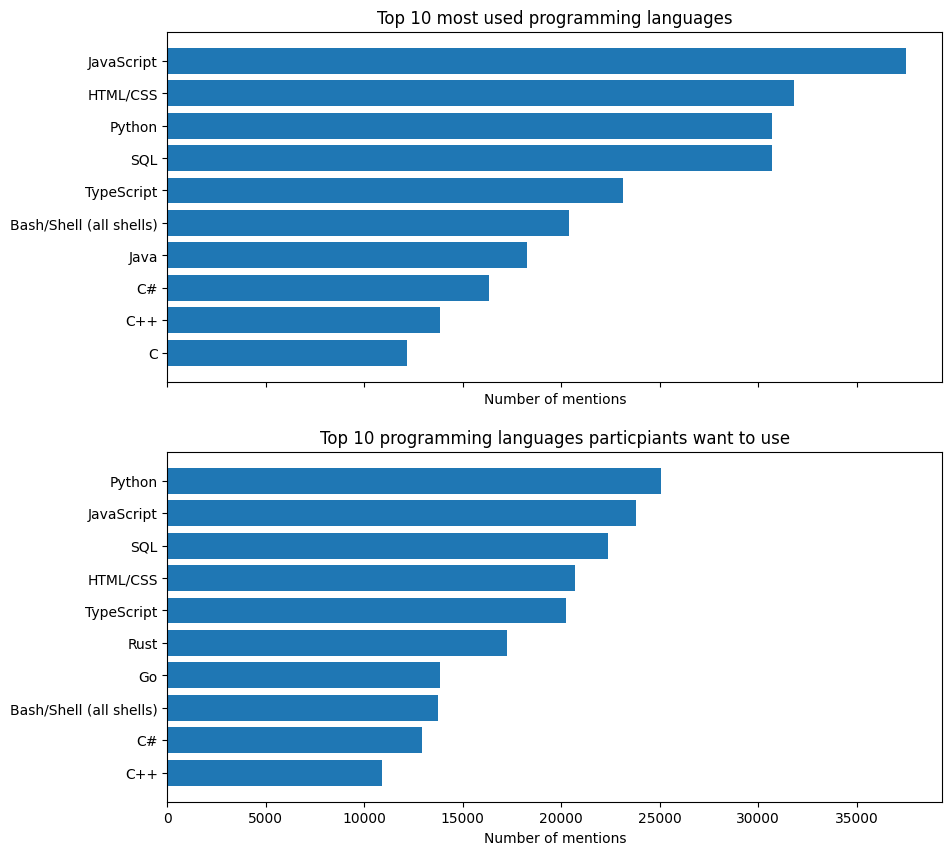

In [385]:
# plot languages used and wanted
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax1.barh(top_lang_used.index[::-1], top_lang_used.values[::-1])
ax1.set_title("Top 10 most used programming languages")
ax1.set_xlabel("Number of mentions")

ax2.barh(top_lang_wanted.index[::-1], top_lang_wanted.values[::-1])
ax2.set_title("Top 10 programming languages particpiants want to use")
ax2.set_xlabel("Number of mentions")

plt.show()

#### 1.1 Is there a difference in the used and wanted languages regarding the developer role?

In [386]:
df_clean["DevType"].value_counts().sort_values(ascending=False)

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator                               552
De

In [387]:
# Let's have a closer look at the following DevTypes
dev_types = ["Developer, full-stack",
             "Developer, back-end",
             "Developer, front-end",
             "Developer, mobile",
             "Data engineer",
             "Data scientist or machine learning specialist"
             ]

In [388]:
def plot_languages(df, devtype):
    df = df[df["DevType"] == devtype]
    df_lang_used = df["LanguageHaveWorkedWith"].explode()
    df_lang_wanted = df["LanguageWantToWorkWith"].explode()
    top_lang_used = df_lang_used.value_counts().head(10)
    top_lang_wanted = df_lang_wanted.value_counts().head(10)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

    ax1.barh(top_lang_used.index[::-1], top_lang_used.values[::-1])
    ax1.set_title(f"Top 10 most used programming languages for {devtype}")
    ax1.set_xlabel("Number of mentions")

    ax2.barh(top_lang_wanted.index[::-1], top_lang_wanted.values[::-1])
    ax2.set_title(f"Top 10 programming languages particpiants want to use for {devtype}")
    ax2.set_xlabel("Number of mentions")

    plt.show()

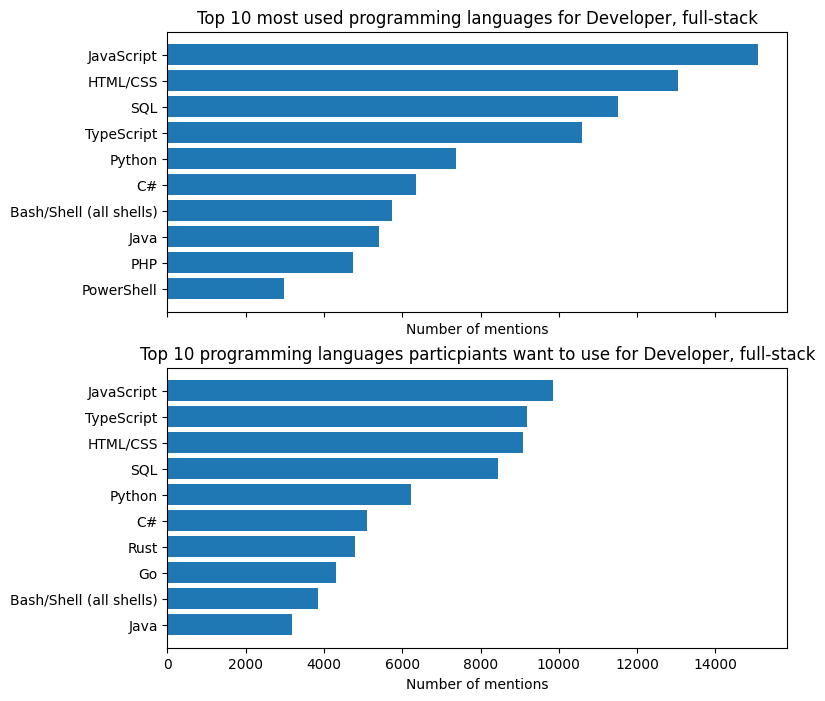

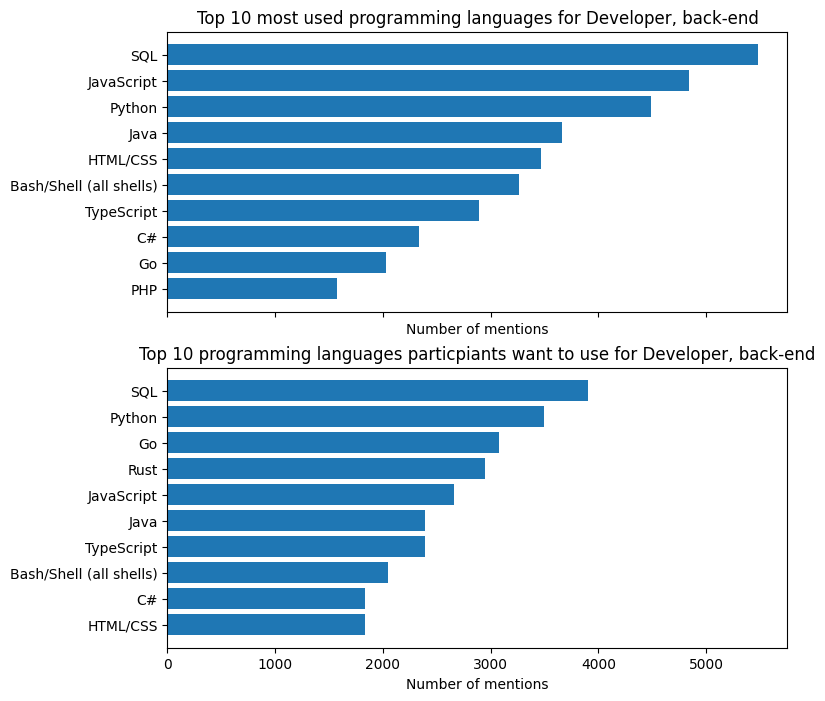

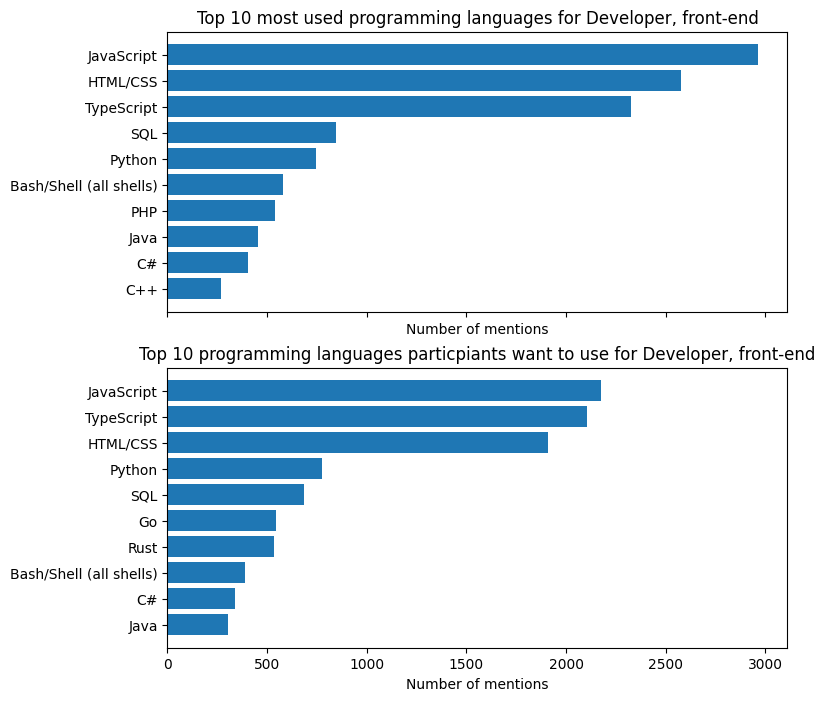

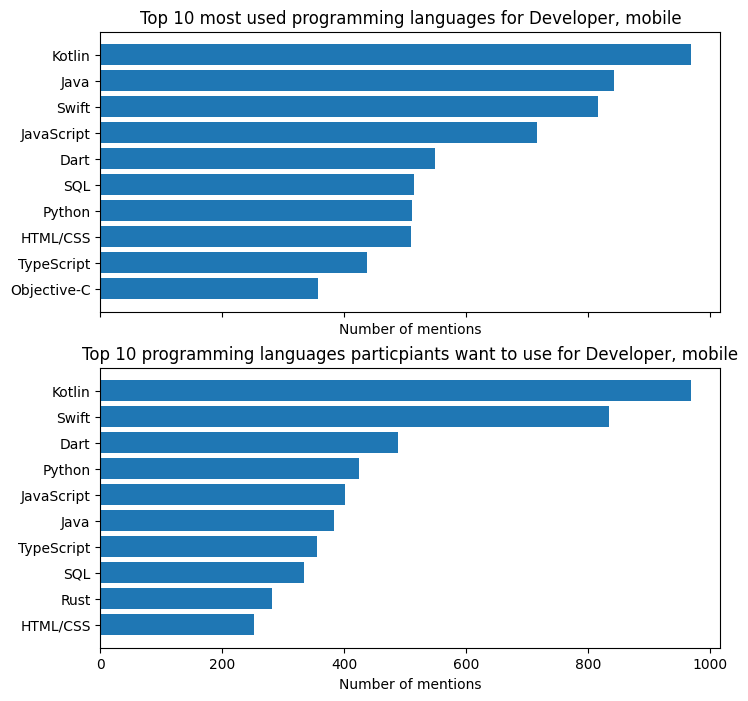

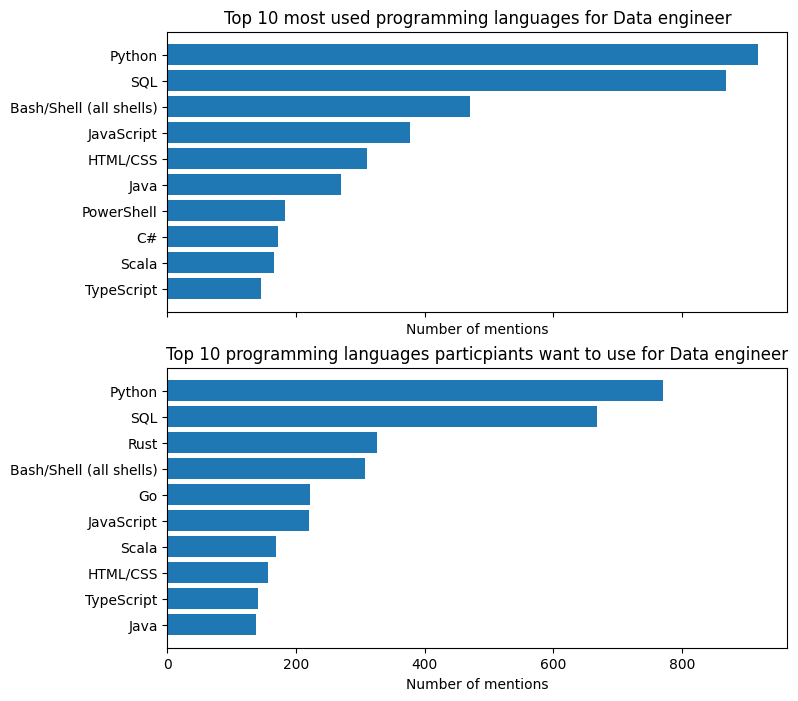

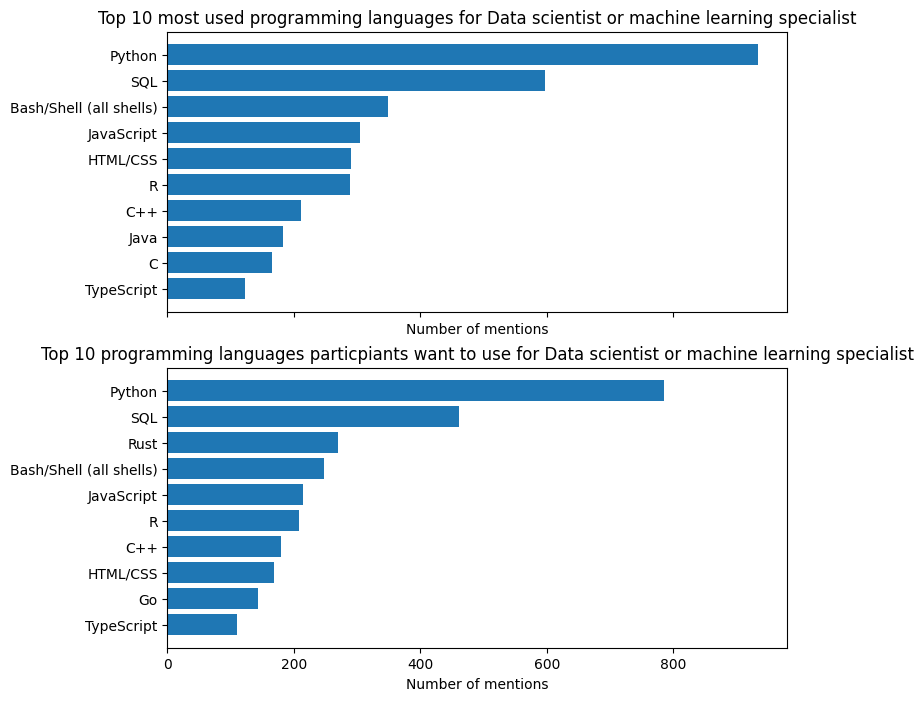

In [389]:
for dev in dev_types:
    plot_languages(df_clean, dev)

There is (no surprise) a difference in the used and wanted languages according the developer profiles.

- For the full-stack and frontend developers JavaScript and HTML/CSS are the top languages.
- For mobile developers the tp 3 are Kotlin, Java and Swift
- for the Data related developers the top languages are Python and SQL (also in the top 3 for backend developers)

But in all developer types there are 2 languages which the participants want to use more:

- **Rust**
- **Go**

Let's have a look especially on those two languages:

#### 1.2 Usage and desired usage of Rust and Go

In [390]:
df_used = df_clean["LanguageHaveWorkedWith"].explode()
df_used = df_used[df_used.isin(["Rust", "Go"])]
df_used = df_used.value_counts()
df_used = df_used.sort_index().reset_index()
df_used.columns = ["Language", "used"]
df_used

,Language,used
0,Go,8103
1,Rust,7559


In [391]:
df_wanted = df_clean["LanguageWantToWorkWith"].explode()
df_wanted = df_wanted[df_wanted.isin(["Rust", "Go"])]
df_wanted = df_wanted.value_counts()
df_wanted = df_wanted.sort_index().reset_index()
df_wanted.columns = ["Language", "want_to_use"]
df_wanted

,Language,want_to_use
0,Go,13837
1,Rust,17232


In [392]:
df_go_rust = pd.concat([df_used])
df_go_rust["want to use"] = df_wanted["want_to_use"]
df_go_rust = df_go_rust.set_index("Language")

In [393]:
df_go_rust

,used,want to use
Language,,
Go,8103,13837
Rust,7559,17232


<Axes: xlabel='Language'>

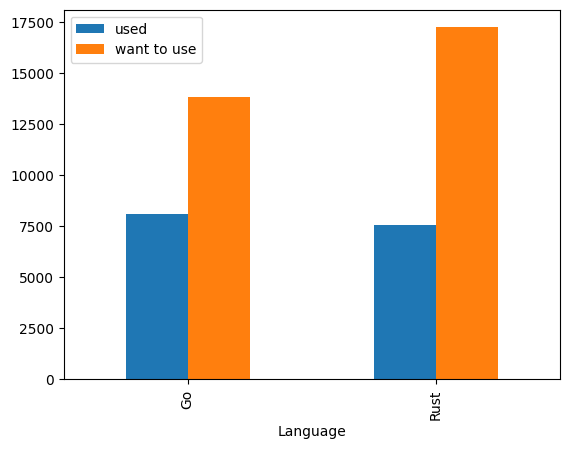

In [394]:
df_go_rust.plot(kind="bar")

#### 2. Which languages offer the highest salaries?

##### 2.1 Highest median salary of all Programming Languages

In [395]:
df_lang_sal = df_clean.explode("LanguageHaveWorkedWith")

In [396]:
df_lang_sal = df_lang_sal.dropna(subset=["LanguageHaveWorkedWith"])

In [397]:
lang_sal_stats = df_lang_sal.groupby("LanguageHaveWorkedWith").agg(
    Median_Salary=("SalaryUSD", "median"),
    Mean_Salary=("SalaryUSD", "mean")
).sort_values("Median_Salary", ascending=False)

In [398]:
Top_10_Salary = lang_sal_stats.head(10)

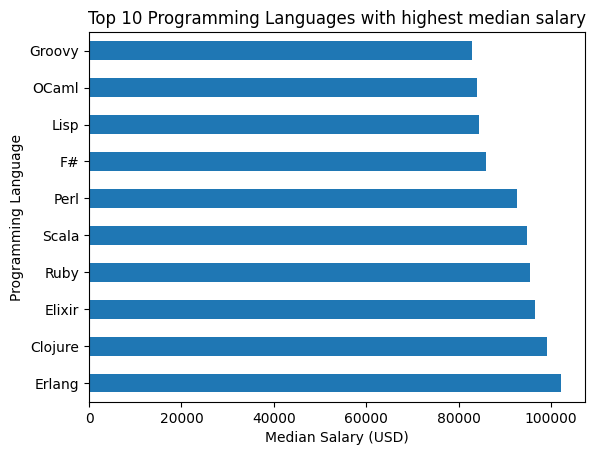

In [399]:
Top_10_Salary["Median_Salary"].plot(kind="barh")
plt.title("Top 10 Programming Languages with highest median salary")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Programming Language");

##### 2.2 Which of the most used languages offer the highest salary?

In [400]:
Top_10_used_sal = df_lang_sal[df_lang_sal["LanguageHaveWorkedWith"].isin(top_lang_used.index)]

In [401]:
Top_lang_sal_stats = Top_10_used_sal.groupby("LanguageHaveWorkedWith").agg(
    Median_Salary=("SalaryUSD", "median"),
    Mean_Salary=("SalaryUSD", "mean")
).sort_values("Median_Salary", ascending=False)

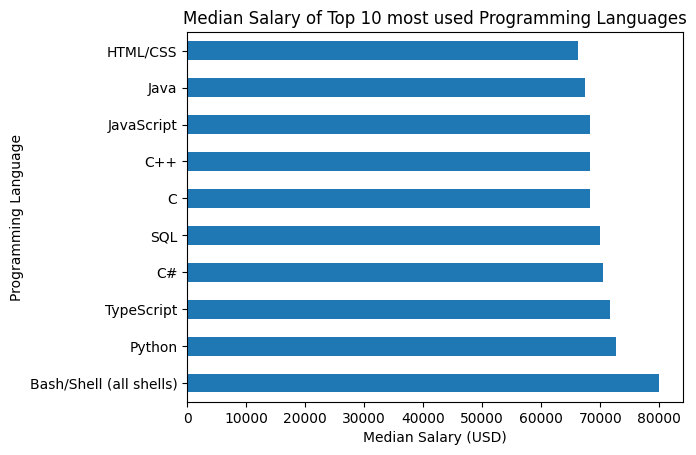

In [402]:
Top_lang_sal_stats["Median_Salary"].plot(kind="barh")
plt.title("Median Salary of Top 10 most used Programming Languages")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Programming Language");

##### 2.3 Which of the Languages developers want to use offer the highest salary?

In [403]:
Top_10_wanted_sal = df_lang_sal[df_lang_sal["LanguageHaveWorkedWith"].isin(top_lang_wanted.index)]

In [404]:
Top_lang_wanted_sal_stats = Top_10_wanted_sal.groupby("LanguageHaveWorkedWith").agg(
    Median_Salary=("SalaryUSD", "median"),
    Mean_Salary=("SalaryUSD", "mean")
).sort_values("Median_Salary", ascending=False)

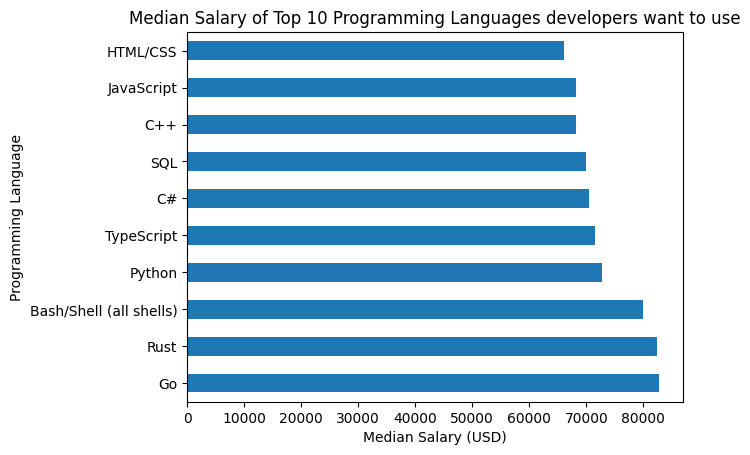

In [405]:
Top_lang_wanted_sal_stats["Median_Salary"].plot(kind="barh")
plt.title("Median Salary of Top 10 Programming Languages developers want to use")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Programming Language");

#### 3. What is the proportion of remote work and are there differences depending on the developer type?

In [406]:
top_dev_types = df_clean["DevType"].value_counts()

In [407]:
top_dev_types

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator                               552
De

In [408]:
devtype_remote = pd.crosstab(df_clean["DevType"], df_clean["RemoteWork"], normalize="index")*100

In [413]:
devtype_remote= devtype_remote.reset_index()

In [414]:
devtype_remote

RemoteWork,DevType,"Hybrid (some remote, some in-person)",In-person,Remote
0,Academic researcher,55.590387,32.392894,12.016719
1,Blockchain,16.831683,11.881188,71.287129
2,Cloud infrastructure engineer,44.975288,8.566722,46.457990
3,Data engineer,48.513011,12.825279,38.661710
4,Data or business analyst,48.101266,25.949367,25.949367
5,Data scientist or machine learning specialist,52.750809,16.504854,30.744337
6,Database administrator,40.764331,27.388535,31.847134
7,Designer,40.875912,17.518248,41.605839
8,DevOps specialist,51.546392,10.515464,37.938144
9,Developer Advocate,29.292929,9.090909,61.616162


In [416]:
devtype_remote = devtype_remote[["DevType", "Remote", "Hybrid (some remote, some in-person)", "In-person"]]
devtype_remote = devtype_remote.rename(columns={"Hybrid (some remote, some in-person)":"Hybrid"})

In [417]:
devtype_remote

RemoteWork,DevType,Remote,Hybrid,In-person
0,Academic researcher,12.016719,55.590387,32.392894
1,Blockchain,71.287129,16.831683,11.881188
2,Cloud infrastructure engineer,46.457990,44.975288,8.566722
3,Data engineer,38.661710,48.513011,12.825279
4,Data or business analyst,25.949367,48.101266,25.949367
5,Data scientist or machine learning specialist,30.744337,52.750809,16.504854
6,Database administrator,31.847134,40.764331,27.388535
7,Designer,41.605839,40.875912,17.518248
8,DevOps specialist,37.938144,51.546392,10.515464
9,Developer Advocate,61.616162,29.292929,9.090909


In [418]:
remote = pd.DataFrame(df_clean["RemoteWork"].value_counts()).reset_index()

In [419]:
remote.columns = ["Remote", "Count"]

In [420]:
total = remote.Count.sum()
remote["Percentage"] = (remote["Count"]/total) * 100

In [421]:
remote = remote.drop("Count", axis=1)

In [422]:
remote = remote.set_index("Remote")

Text(0, 0.5, 'Type of Remote Work')

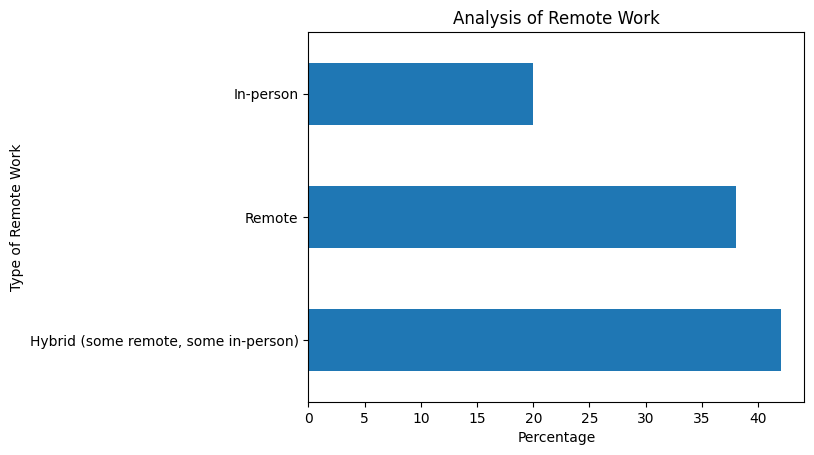

In [423]:
remote["Percentage"].plot(kind="barh")
plt.title("Analysis of Remote Work")
plt.xlabel("Percentage")
plt.ylabel("Type of Remote Work")

In [426]:
remote

,Percentage
Remote,
"Hybrid (some remote, some in-person)",41.993577
Remote,38.008612
In-person,19.997810


In [429]:
avg_data = {
    "DevType": ["Average"],
    "Remote": remote["Percentage"][1],
    "Hybrid": remote["Percentage"][0],
    "In-person": remote["Percentage"][2]
}

C:\Users\P371761\AppData\Local\Temp\1\ipykernel_32952\3517148801.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Remote": remote["Percentage"][1],
C:\Users\P371761\AppData\Local\Temp\1\ipykernel_32952\3517148801.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Hybrid": remote["Percentage"][0],
C:\Users\P371761\AppData\Local\Temp\1\ipykernel_32952\3517148801.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "In-person": re

In [430]:
df_avg = pd.DataFrame(avg_data)
df_avg

,DevType,Remote,Hybrid,In-person
0,Average,38.008612,41.993577,19.99781


In [431]:
df_combined = pd.concat([devtype_remote, df_avg])
df_combined

,DevType,Remote,Hybrid,In-person
0,Academic researcher,12.016719,55.590387,32.392894
1,Blockchain,71.287129,16.831683,11.881188
2,Cloud infrastructure engineer,46.457990,44.975288,8.566722
3,Data engineer,38.661710,48.513011,12.825279
4,Data or business analyst,25.949367,48.101266,25.949367
5,Data scientist or machine learning specialist,30.744337,52.750809,16.504854
6,Database administrator,31.847134,40.764331,27.388535
7,Designer,41.605839,40.875912,17.518248
8,DevOps specialist,37.938144,51.546392,10.515464
9,Developer Advocate,61.616162,29.292929,9.090909


Text(0, 0.5, 'Developer Type')

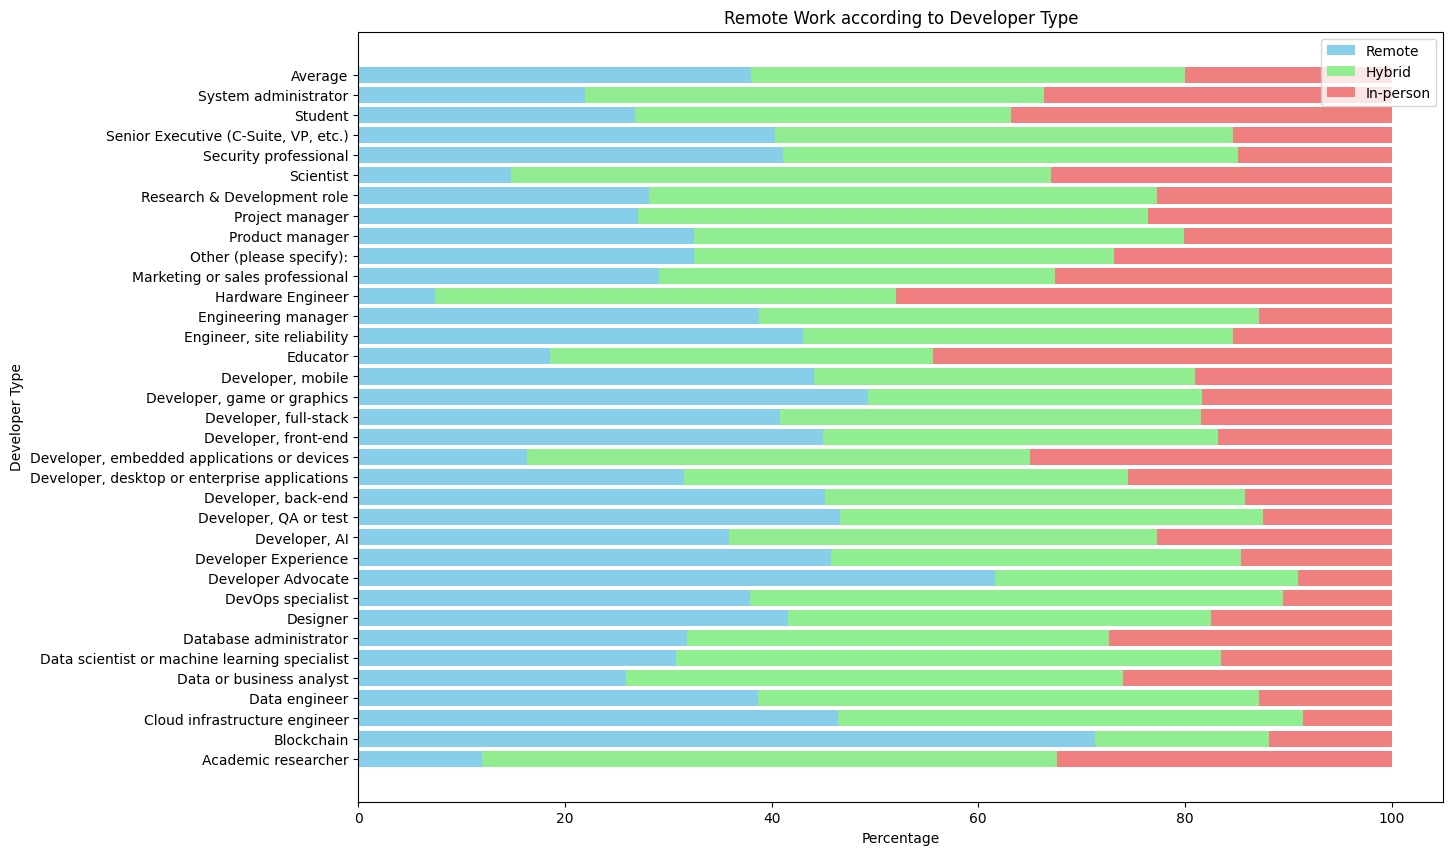

In [442]:
plt.figure(figsize=(14,10))
plt.barh(df_combined["DevType"], df_combined["Remote"], color="skyblue", label="Remote")
plt.barh(df_combined["DevType"], df_combined["Hybrid"], left = df_combined["Remote"], color="lightgreen", label="Hybrid")
plt.barh(df_combined["DevType"], df_combined["In-person"], left=df_combined["Remote"] + df_combined["Hybrid"], color="lightcoral", label="In-person")
plt.legend()
plt.title("Remote Work according to Developer Type")
plt.xlabel("Percentage")
plt.ylabel("Developer Type")

## 5. Evaluation

## 6. Deployment / Presentation